In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc,recall_score
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_predict

from sklearn.externals import joblib

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
df=pd.read_csv('census.csv')
pd.set_option('display.max_columns',None)

In [3]:
df.columns=['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','target']

In [4]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,target
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
df.shape

(32560, 15)

In [6]:
df.dtypes  

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
target            object
dtype: object

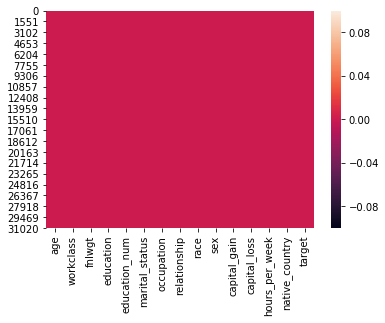

In [7]:
sns.heatmap(df.isnull())#there are no missing values in the dataset

In [8]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
target            0
dtype: int64

In [9]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
#outliers are present in some columns as difference between mean value and max value is very high.

# EDA

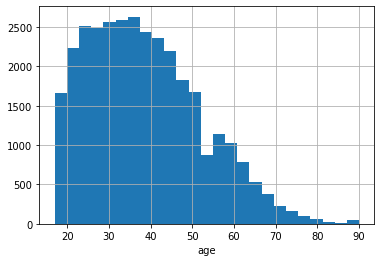

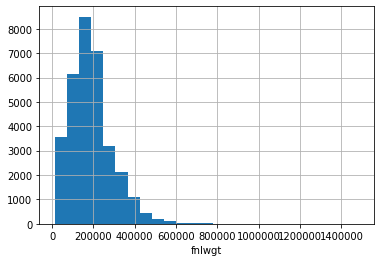

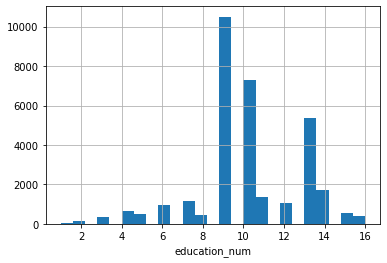

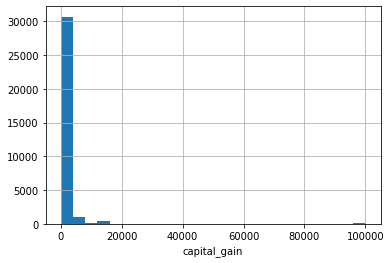

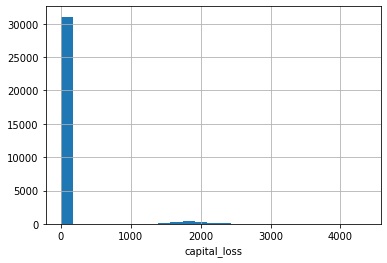

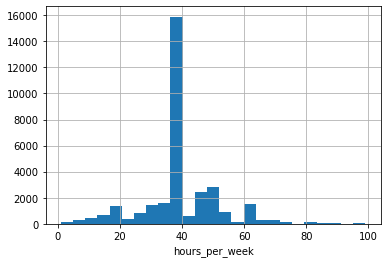

In [10]:
#checking for skewness
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    
    df[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.show()

In [11]:
#checking relation of each attribute w.r.t target attribute

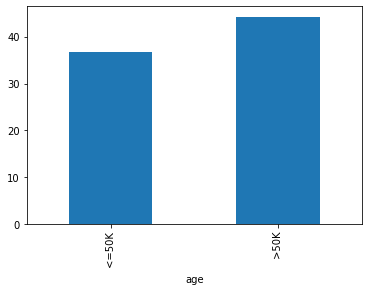

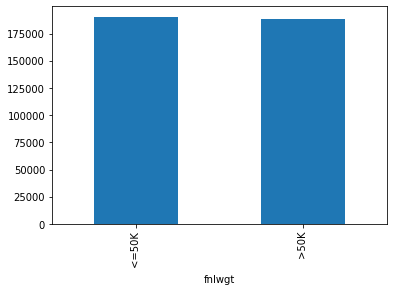

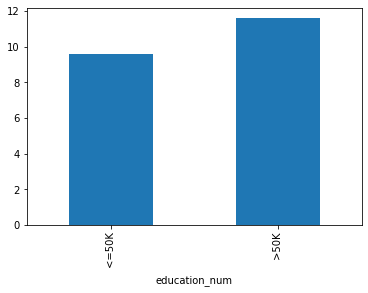

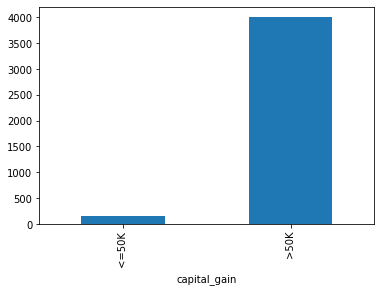

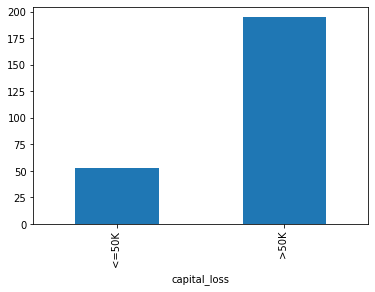

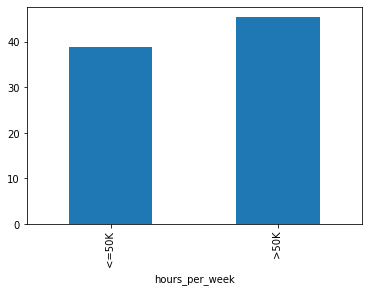

In [12]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    
    df.groupby('target')[feature].mean().plot.bar()
    plt.xlabel(feature)
    plt.show()


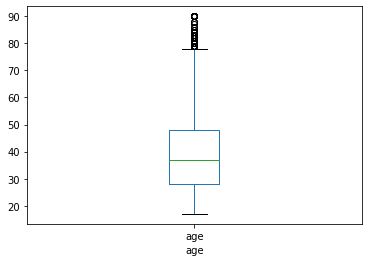

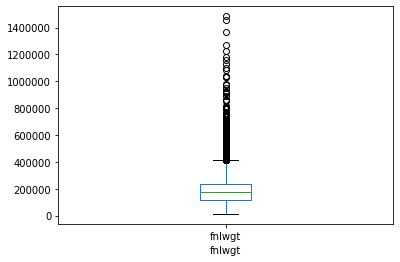

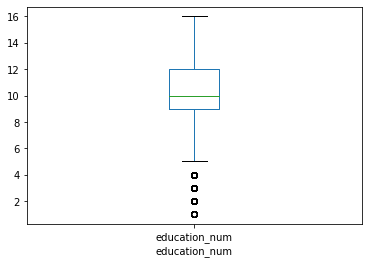

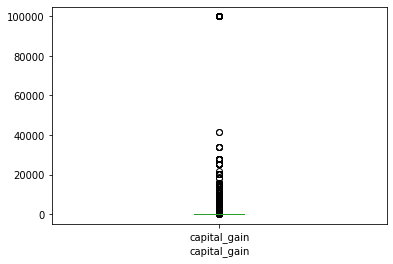

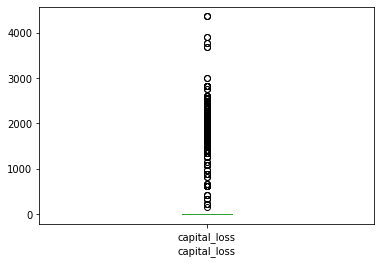

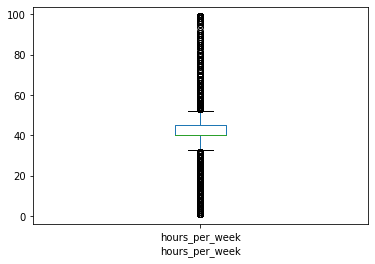

In [13]:
#checking for outliers

numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    
    df[feature].plot.box()
    plt.xlabel(feature)
    plt.show()

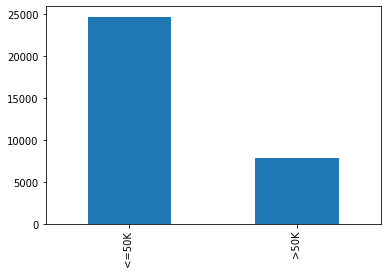

In [14]:
#checking if imbalanced dataset
df['target'].value_counts().plot.bar()

# Feature Engineering

In [10]:
df['target'].value_counts()

 <=50K    24719
 >50K      7841
Name: target, dtype: int64

In [11]:
#Replacing instead of label encoding because we want >50K=1 & No:<=50K
df['target']=df['target'].replace([' >50K',' <=50K'],[1,0])

In [12]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,target
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


In [13]:
df['target'].value_counts()

0    24719
1     7841
Name: target, dtype: int64

# Making dummies

In [14]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='object']
for feature in categorical_features:
    if df[feature].nunique()>=2:
        print(feature,df[feature].nunique())

workclass 9
education 16
marital_status 7
occupation 15
relationship 6
race 5
sex 2
native_country 42


In [15]:
df=pd.concat([df,pd.get_dummies(df['workclass'],prefix=str('workclass'),prefix_sep='_')],axis=1)
df=pd.concat([df,pd.get_dummies(df['education'],prefix=str('education'),prefix_sep='_')],axis=1)
df=pd.concat([df,pd.get_dummies(df['marital_status'],prefix=str('marital_status'),prefix_sep='_')],axis=1)
df=pd.concat([df,pd.get_dummies(df['occupation'],prefix=str('occupation'),prefix_sep='_')],axis=1)
df=pd.concat([df,pd.get_dummies(df['relationship'],prefix=str('relationship'),prefix_sep='_')],axis=1)
df=pd.concat([df,pd.get_dummies(df['race'],prefix=str('race'),prefix_sep='_')],axis=1)
df=pd.concat([df,pd.get_dummies(df['sex'],prefix=str('sex'),prefix_sep='_')],axis=1)



In [16]:
#dropping columns as we have extracted data by dummies technique
df=df.drop(['workclass','education','marital_status','occupation','relationship','race','sex','native_country'],axis=1)

In [17]:
df.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,target,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,occupation_ ?,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,50,83311,13,0,0,13,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
1,38,215646,9,0,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
2,53,234721,7,0,0,40,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,28,338409,13,0,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
4,37,284582,14,0,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0


In [18]:
df.shape

(32560, 67)

# Removing outliers

In [19]:
from scipy.stats import zscore
z=abs(zscore(df))
z.shape

(32560, 67)

In [20]:
df=df[(z<3).all(axis=1)]
df.shape

(8594, 67)

# Separating target and independent variables

In [21]:
y=df['target']
X=df.drop(['target'],axis=1)

# Applying Power transformation to remove skewness

In [22]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson') 
X_power=pt.fit_transform(X)
df=pd.DataFrame(X_power,columns=X.columns)

In [23]:
df.skew()

age               0.005383
fnlwgt           -0.031845
education_num     0.354679
capital_gain      3.127805
capital_loss     30.858100
                   ...    
race_ Black       0.000000
race_ Other       0.000000
race_ White       0.000000
sex_ Female       0.750257
sex_ Male        -0.750257
Length: 66, dtype: float64

In [24]:
df.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,occupation_ ?,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,0.642658,-0.159224,1.449707,3.419701,-0.032378,-0.102326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.662632,0.0,-0.824915,0.0,0.0,0.0,-0.700883,-0.45164,0.0,1.168005,0.0,-0.829504,0.0,0.0,0.0,-0.459090,0.0,-0.522852,2.200519,0.0,0.0,0.0,-0.391666,0.0,-0.355656,0.0,-0.491841,0.0,0.0,1.176679,-0.648094,0.0,-0.492388,-0.313936,0.0,0.0,0.0,0.0,0.0,0.0,-0.692960,0.692960
1,-1.131225,-0.601590,1.449707,-0.292425,-0.032378,-1.055736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.662632,0.0,-0.824915,0.0,0.0,0.0,-0.700883,-0.45164,0.0,-0.856160,0.0,1.205540,0.0,0.0,0.0,2.178222,0.0,-0.522852,-0.454438,0.0,0.0,0.0,-0.391666,0.0,-0.355656,0.0,-0.491841,0.0,0.0,-0.849850,-0.648094,0.0,2.030918,-0.313936,0.0,0.0,0.0,0.0,0.0,0.0,1.443086,-1.443086
2,-1.696903,-0.061010,-1.039765,-0.292425,-0.032378,-0.102326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.601456,0.0,1.212246,0.0,0.0,0.0,-0.700883,-0.45164,0.0,-0.856160,0.0,1.205540,0.0,0.0,0.0,-0.459090,0.0,1.912588,-0.454438,0.0,0.0,0.0,-0.391666,0.0,-0.355656,0.0,-0.491841,0.0,0.0,-0.849850,-0.648094,0.0,2.030918,-0.313936,0.0,0.0,0.0,0.0,0.0,0.0,-0.692960,0.692960
3,1.092805,0.205564,-1.039765,-0.292425,-0.032378,-0.102326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.601456,0.0,1.212246,0.0,0.0,0.0,-0.700883,-0.45164,0.0,1.168005,0.0,-0.829504,0.0,0.0,0.0,-0.459090,0.0,1.912588,-0.454438,0.0,0.0,0.0,-0.391666,0.0,-0.355656,0.0,-0.491841,0.0,0.0,1.176679,-0.648094,0.0,-0.492388,-0.313936,0.0,0.0,0.0,0.0,0.0,0.0,-0.692960,0.692960
4,-0.249432,-1.123438,0.109044,-0.292425,-0.032378,-0.300962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.601456,0.0,-0.824915,0.0,0.0,0.0,1.426771,-0.45164,0.0,1.168005,0.0,-0.829504,0.0,0.0,0.0,-0.459090,0.0,-0.522852,-0.454438,0.0,0.0,0.0,-0.391666,0.0,-0.355656,0.0,2.033178,0.0,0.0,1.176679,-0.648094,0.0,-0.492388,-0.313936,0.0,0.0,0.0,0.0,0.0,0.0,-0.692960,0.692960


# Scaling the Data

In [25]:
#Applying Standard scalar to independent variable only
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_scaled=ss.fit_transform(df)
x=pd.DataFrame(data=X_scaled,columns=df.columns)


In [26]:
x.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,occupation_ ?,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,0.642658,-0.159224,1.449707,3.419701,-0.032378,-0.102326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.662632,0.0,-0.824915,0.0,0.0,0.0,-0.700883,-0.45164,0.0,1.168005,0.0,-0.829504,0.0,0.0,0.0,-0.459090,0.0,-0.522852,2.200519,0.0,0.0,0.0,-0.391666,0.0,-0.355656,0.0,-0.491841,0.0,0.0,1.176679,-0.648094,0.0,-0.492388,-0.313936,0.0,0.0,0.0,0.0,0.0,0.0,-0.692960,0.692960
1,-1.131225,-0.601590,1.449707,-0.292425,-0.032378,-1.055736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.662632,0.0,-0.824915,0.0,0.0,0.0,-0.700883,-0.45164,0.0,-0.856160,0.0,1.205540,0.0,0.0,0.0,2.178222,0.0,-0.522852,-0.454438,0.0,0.0,0.0,-0.391666,0.0,-0.355656,0.0,-0.491841,0.0,0.0,-0.849850,-0.648094,0.0,2.030918,-0.313936,0.0,0.0,0.0,0.0,0.0,0.0,1.443086,-1.443086
2,-1.696903,-0.061010,-1.039765,-0.292425,-0.032378,-0.102326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.601456,0.0,1.212246,0.0,0.0,0.0,-0.700883,-0.45164,0.0,-0.856160,0.0,1.205540,0.0,0.0,0.0,-0.459090,0.0,1.912588,-0.454438,0.0,0.0,0.0,-0.391666,0.0,-0.355656,0.0,-0.491841,0.0,0.0,-0.849850,-0.648094,0.0,2.030918,-0.313936,0.0,0.0,0.0,0.0,0.0,0.0,-0.692960,0.692960
3,1.092805,0.205564,-1.039765,-0.292425,-0.032378,-0.102326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.601456,0.0,1.212246,0.0,0.0,0.0,-0.700883,-0.45164,0.0,1.168005,0.0,-0.829504,0.0,0.0,0.0,-0.459090,0.0,1.912588,-0.454438,0.0,0.0,0.0,-0.391666,0.0,-0.355656,0.0,-0.491841,0.0,0.0,1.176679,-0.648094,0.0,-0.492388,-0.313936,0.0,0.0,0.0,0.0,0.0,0.0,-0.692960,0.692960
4,-0.249432,-1.123438,0.109044,-0.292425,-0.032378,-0.300962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.601456,0.0,-0.824915,0.0,0.0,0.0,1.426771,-0.45164,0.0,1.168005,0.0,-0.829504,0.0,0.0,0.0,-0.459090,0.0,-0.522852,-0.454438,0.0,0.0,0.0,-0.391666,0.0,-0.355656,0.0,2.033178,0.0,0.0,1.176679,-0.648094,0.0,-0.492388,-0.313936,0.0,0.0,0.0,0.0,0.0,0.0,-0.692960,0.692960


# Model Building

In [27]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,stratify=y)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [29]:
knn=KNeighborsClassifier()
svc=SVC()
lr=LogisticRegression()
dt=DecisionTreeClassifier()
gnb=GaussianNB()
rfc=RandomForestClassifier()
xgb=XGBClassifier()
gbc=GradientBoostingClassifier()
ada=AdaBoostClassifier()

In [30]:
models=[]
models.append(('KNeighborsClassifier',knn))
models.append(('SVC',svc))
models.append(('LogisticRegression',lr))
models.append(('DecisionTreeClassifier',dt))
models.append(('GaussianNB',gnb))
models.append(('RandomForestClassifier',rfc))
models.append(('XGBClassifier',xgb))
models.append(('GradientBoostingClassifier',gbc))
models.append(('AdaBoostClassifier',ada))

In [31]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc,recall_score

***************** KNeighborsClassifier *******************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


Accuracy_score  - 0.8166589111214518


cross_val_score  - 0.8211578166006174


roc_auc_score  - 0.7433331970101931


Recall_score  - 0.6047430830039525


classification report
               precision    recall  f1-score   support

           0       0.88      0.88      0.88      1643
           1       0.61      0.60      0.61       506

    accuracy                           0.82      2149
   macro avg       0.75      0.74      0.74      2149
weighted avg       0.82      0.82      0.82      2149



[[1449  194]
 [ 200  306]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



***************** SVC *******************


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated'

cross_val_score  - 0.8576978876391126


roc_auc_score  - 0.7538449139841079


Recall_score  - 0.5770750988142292


classification report
               precision    recall  f1-score   support

           0       0.88      0.93      0.90      1643
           1       0.72      0.58      0.64       506

    accuracy                           0.85      2149
   macro avg       0.80      0.75      0.77      2149
weighted avg       0.84      0.85      0.84      2149



[[1529  114]
 [ 214  292]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)





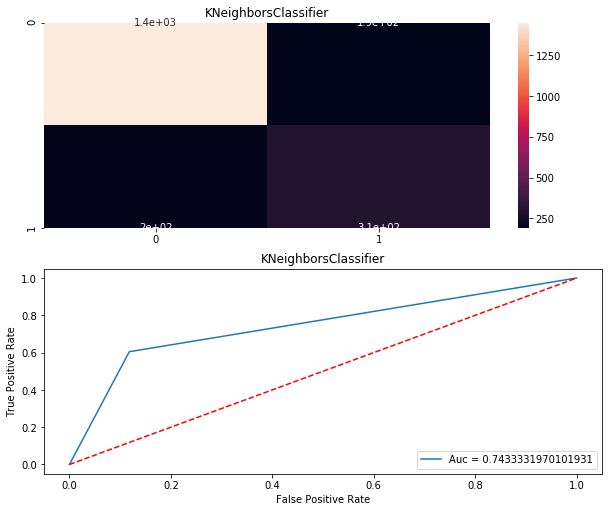

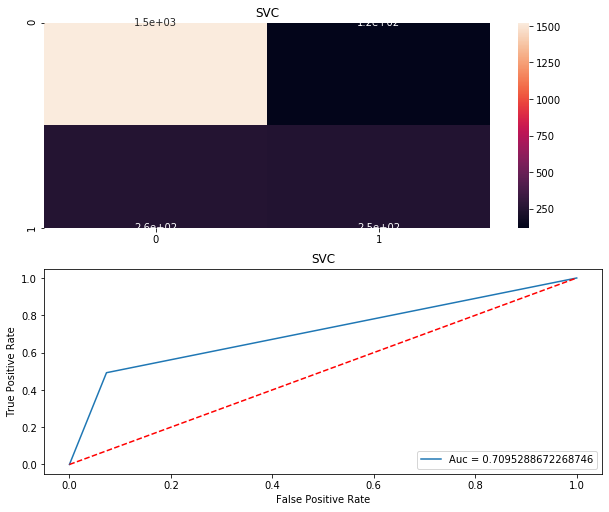

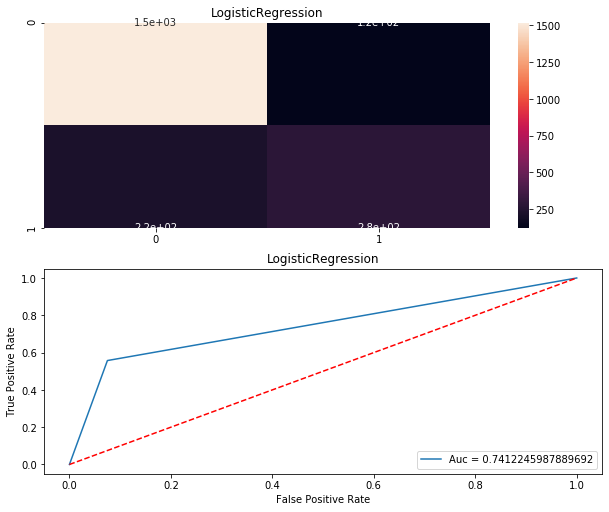

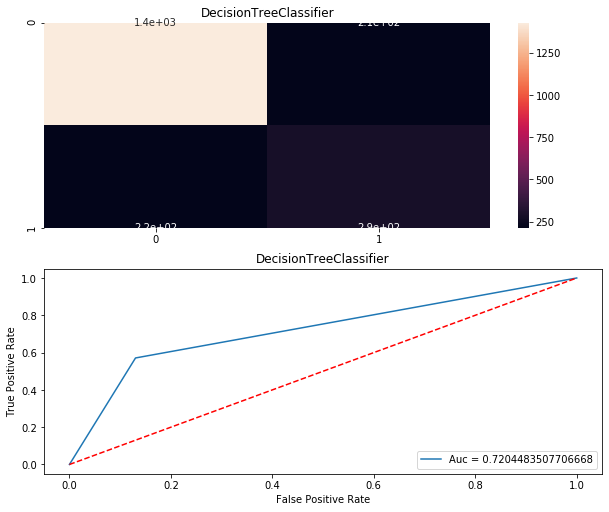

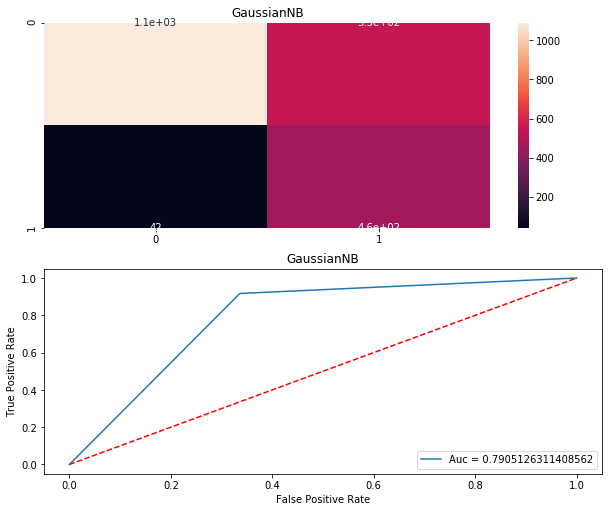

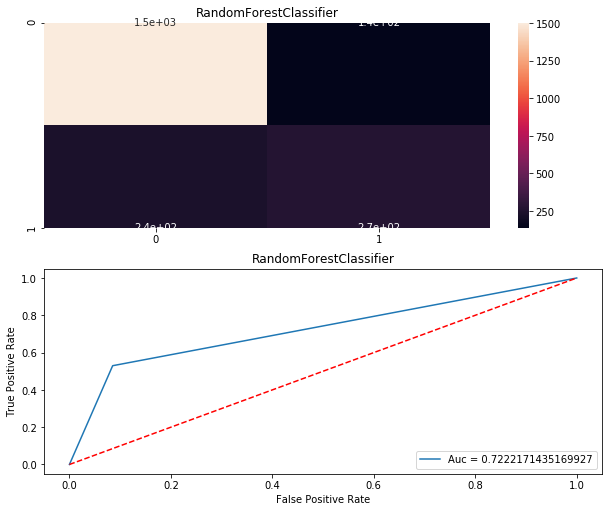

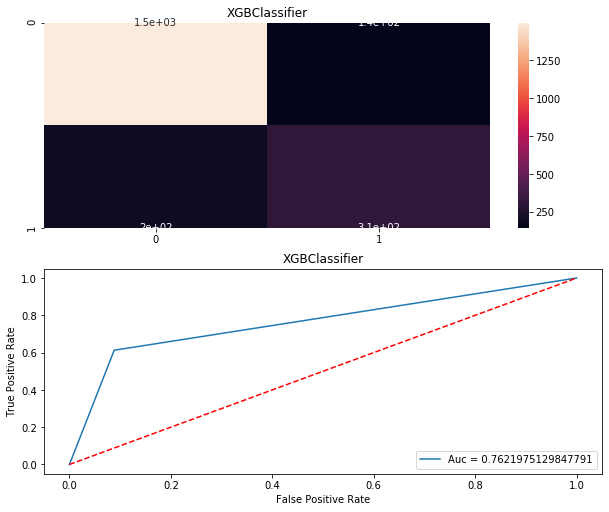

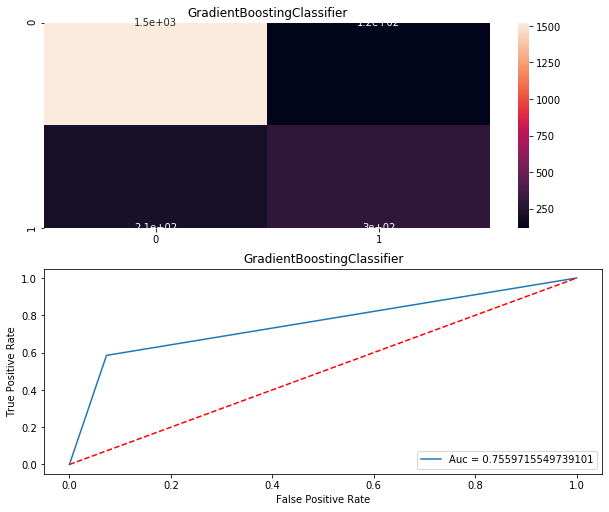

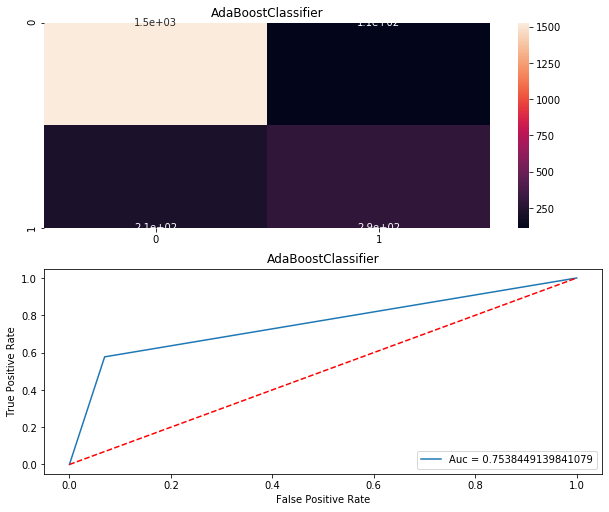

In [37]:
Model=[]
score=[]
cv=[]
rocscore=[]
recall=[]
for name,model in models:
    print('*****************',name,'*******************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score  -',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('cross_val_score  -',sc)
    cv.append(sc*100)
    print('\n')
    
    fpr,tpr,threshold=roc_curve(y_test,pre)
    roc_auc=auc(fpr,tpr)
    print('roc_auc_score  -',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    
    re=recall_score(y_test,pre)
    print('Recall_score  -',re)
    recall.append(re*100)
    print('\n')
    
    print('classification report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(fpr,tpr,label='Auc = ' +str(roc_auc))
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')
    

In [38]:
result=pd.DataFrame({'Model':Model,'Accuracy_score':score,'Cross_val_score':cv})
result

,Model,Accuracy_score,Cross_val_score
0,KNeighborsClassifier,81.665891,82.115782
1,SVC,82.456957,83.302668
2,LogisticRegression,83.852955,83.872828
3,DecisionTreeClassifier,79.944160,80.230490
4,GaussianNB,72.359237,76.180728
5,RandomForestClassifier,82.410423,82.977330
6,XGBClassifier,84.132154,84.955131
7,GradientBoostingClassifier,84.644020,85.699832
8,AdaBoostClassifier,84.737087,85.769789


In [39]:
#We can see from the table AdaBoostClassifier is the best performing Algorithms.
#but our target accuracy score is 90%
#to improve the score we will apply gridsearchcv technique to the top the performing models.

In [40]:
#First lets calculate the random state of the models at which they perform the best.
#Then we will select the top3 models and do gridsearchcv on them to attain our target score of 90%.

# Finding the best random_state 

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,recall_score
from sklearn.linear_model import LogisticRegression
def maxaccuracy_score(model,x,y):
    max_accuracy=0
    for r_state in range(42,101):
        
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,stratify=y)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        score=accuracy_score(y_test,pred)
        
        if score>max_accuracy:
            max_accuracy=score
            final_r_state=r_state
    print('max_accuracy_score is at random_state  ',final_r_state,'  which is  ',max_accuracy)
    return final_r_state

In [42]:
print('knn',maxaccuracy_score(knn,x,y))
print('svc',maxaccuracy_score(svc,x,y))
print('lr',maxaccuracy_score(lr,x,y))
print('dt',maxaccuracy_score(dt,x,y))
print('gnb',maxaccuracy_score(gnb,x,y))
print('rfc',maxaccuracy_score(rfc,x,y))
print('xgb',maxaccuracy_score(xgb,x,y))
print('gbc',maxaccuracy_score(gbc,x,y))
print('ada',maxaccuracy_score(ada,x,y))

max_accuracy_score is at random_state   63   which is   0.8417868776174965
knn 63
max_accuracy_score is at random_state   63   which is   0.8478362028850628
svc 63
max_accuracy_score is at random_state   48   which is   0.85248953001396
lr 48
max_accuracy_score is at random_state   63   which is   0.8227082363890181
dt 63
max_accuracy_score is at random_state   91   which is   0.7892042810609586
gnb 91
max_accuracy_score is at random_state   46   which is   0.842717543043276
rfc 46
max_accuracy_score is at random_state   46   which is   0.8599348534201955
xgb 46
max_accuracy_score is at random_state   57   which is   0.8697068403908795
gbc 57
max_accuracy_score is at random_state   67   which is   0.8664495114006515
ada 67


In [43]:
#We can see GradientBoostingClassifier is performing the best at random_state=46
 
#selecting our top models to be used for gridsearchcv

#model-1-->AdaBoostClassifier(accuracy=86.64%) at random_state=67
#model-2-->GradientBoostingClassifier(accuracy=86.97%) at random_state=57
#model-3-->XGBoostClassifier(accuracy=85.99%) at random_state=46
#model-4-->SVC(accuracy=84.78%) at random_state=63

# GridSearchCV

# model-1-->AdaBoostClassifier(accuracy=86.64%) at random_state=67

In [32]:
ada=AdaBoostClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=67,stratify=y)

In [33]:
parameters=[{'base_estimator':[lr,xgb],'n_estimators':[100,150,200],'learning_rate':[0.1,0.001,1]}]
            
grid_search=GridSearchCV(ada,parameters,scoring='accuracy',n_jobs=-1,cv=5)
grid_search=grid_search.fit(x_train,y_train)
grid_search.best_params_ 

{'base_estimator': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=None, solver='warn', tol=0.0001, verbose=0,
                    warm_start=False),
 'learning_rate': 0.1,
 'n_estimators': 200}

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=67,stratify=y)
ada=AdaBoostClassifier(base_estimator=LogisticRegression(random_state=48),n_estimators=200,learning_rate=0.1)
ada.fit(x_train,y_train)
pred_ada=ada.predict(x_test)
score=accuracy_score(y_test,pred_ada)
print('Accuracy=  ',score)


Accuracy=   0.845974872033504


In [86]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
from sklearn.model_selection import cross_val_predict
ada=AdaBoostClassifier(base_estimator=LogisticRegression(random_state=48),n_estimators=200,learning_rate=0.1)
cvs=cross_val_score(ada,x,y,scoring='accuracy',cv=5)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(ada,x,y,cv=5)
conf_mat=confusion_matrix(y_pred,y)
conf_mat

cross_val_scores=   0.8393085524000325


array([[6033,  842],
       [ 539, 1180]], dtype=int64)

# model-2-->GradientBoostingClassifier(accuracy=86.97%) at random_state=57

In [36]:
gbc=GradientBoostingClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=57,stratify=y)

In [37]:
parameters=[{'max_depth':[5,7,9,10],'learning_rate':[1,0.1,0.001],'n_estimators':[100,250,500]}]
            
grid_search=GridSearchCV(gbc,parameters,scoring='accuracy',n_jobs=-1,cv=10)
grid_search=grid_search.fit(x_train,y_train)
grid_search.best_params_ 

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=96,stratify=y)
gbc=GradientBoostingClassifier(learning_rate=0.1,max_depth=5,n_estimators=100)
gbc.fit(x_train,y_train)
pred_gbc=gbc.predict(x_test)
score=accuracy_score(y_test,pred_gbc)
print('Accuracy_score=  ',score)

Accuracy_score=   0.849232201023732


In [87]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
from sklearn.model_selection import cross_val_predict
gbc=GradientBoostingClassifier(learning_rate=0.1,max_depth=5,n_estimators=100)
cvs=cross_val_score(gbc,x,y,scoring='accuracy',cv=5)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(gbc,x,y,cv=5)
conf_mat=confusion_matrix(y_pred,y)
conf_mat

cross_val_scores=   0.8560628908682351


array([[6079,  743],
       [ 493, 1279]], dtype=int64)

# model-3-->XGBoostClassifier(accuracy=85.99%) at random_state=46

In [43]:
xgb=XGBClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=46,stratify=y)

In [44]:
parameters=[{'max_depth':[5,7,9,10],'learning_rate':[1,0.1,0.001]}]
            
grid_search=GridSearchCV(xgb,parameters,scoring='accuracy',n_jobs=-1,cv=10)
grid_search=grid_search.fit(x_train,y_train)
grid_search.best_params_ 

{'learning_rate': 0.1, 'max_depth': 5}

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=46,stratify=y)
xgb=XGBClassifier(learning_rate=0.1,max_depth=5)
xgb.fit(x_train,y_train)
pred_xgb=xgb.predict(x_test)
score=accuracy_score(y_test,pred_xgb)
print('Accuracy_score=  ',score)

Accuracy_score=   0.8650535132619823


In [88]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
from sklearn.model_selection import cross_val_predict
xgb=XGBClassifier(learning_rate=0.1,max_depth=5)
cvs=cross_val_score(xgb,x,y,scoring='accuracy',cv=5)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(xgb,x,y,cv=5)
conf_mat=confusion_matrix(y_pred,y)
conf_mat

cross_val_scores=   0.8597869345101119


array([[6122,  755],
       [ 450, 1267]], dtype=int64)

# model-4-->SVC(accuracy=84.78%) at random_state=63

In [47]:
svc=SVC()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=63,stratify=y)

In [48]:
parameters=[{'C':[0.1,0.5,1,2],'kernel':['rbf','linear','poly']}]
            
grid_search=GridSearchCV(svc,parameters,scoring='accuracy',n_jobs=1,cv=10)
grid_search=grid_search.fit(x_train,y_train)
grid_search.best_params_ 

{'C': 0.1, 'kernel': 'linear'}

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=56,stratify=y)
svc=SVC(C=0.1,kernel='linear')
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
score=accuracy_score(y_test,pred_svc)
print('Accuracy_score=  ',score)

Accuracy_score=   0.8362028850628199


In [89]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
from sklearn.model_selection import cross_val_predict
svc=SVC(C=0.1,kernel='linear')
cvs=cross_val_score(svc,x,y,scoring='accuracy',cv=5)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(svc,x,y,cv=5)
conf_mat=confusion_matrix(y_pred,y)
conf_mat

cross_val_scores=   0.8322133632942579


array([[6109,  979],
       [ 463, 1043]], dtype=int64)

# Saving XGBClassifier model

In [85]:
#From all the model tried above XGBClassifier model's has highest cross_val_score ,
#hence saving the XGBClassifier model.
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=46,stratify=y)
xgb=XGBClassifier(learning_rate=0.1,max_depth=5)
xgb.fit(x_train,y_train)
cvs=cross_val_score(xgb,x,y,scoring='accuracy',cv=5)
print('crossvalscore=  ',cvs.mean())
y_pred=cross_val_predict(xgb,x,y,cv=5)
conf_mat=confusion_matrix(y_pred,y)
conf_mat

crossvalscore=   0.8597869345101119


array([[6122,  755],
       [ 450, 1267]], dtype=int64)

In [82]:
from sklearn.externals import joblib
joblib.dump(xgb,'project6-census.obj')

['project6-census.obj']

In [83]:
model=joblib.load('project6-census.obj')

In [84]:
Final_predictions=model.predict(x_test)
Final_predictions=pd.DataFrame(Final_predictions,columns=['>50K(1),<50K(0)'])
Final_predictions[:5]

,">50K(1),<50K(0)"
0,0
1,1
2,0
3,0
4,1


# Saving final predictions in file.csv format

In [75]:
Final_predictions.to_csv('E:\\final_predictionscensus.csv',index=False)

# Conclusion:-